<a href="https://colab.research.google.com/github/ys-0205/-/blob/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import random


In [4]:
# 가상 객체의 햅틱 속성을 나타내는 파라미터 범위 정의 (예시)
# 실제 논문에서는 더 구체적인 파라미터들이 사용될 것입니다.
# 예: [진동 주파수, 진동 세기, 힘 피드백 강성, 마찰계수]
PARAM_BOUNDS = {
    'vibration_freq': (20, 300),  # Hz
    'vibration_amp': (0.1, 1.0),   # Normalized amplitude
    'force_stiffness': (10, 1000), # N/m
    'friction_coeff': (0.05, 0.8)  # Dimensionless
}
PARAM_KEYS = list(PARAM_BOUNDS.keys())
NUM_PARAMS = len(PARAM_KEYS)

# 이 단계에서는 실제 데이터를 로드하기보다는,
# GA가 탐색할 파라미터의 정의와 범위를 설정하는 것이 중요합니다.
# 만약 목표 햅틱 데이터(예: 실제 객체에서 측정한 값)가 있다면 로드할 수 있습니다.
# target_haptic_profile = load_target_data('target_object_haptics.csv') # 예시

# --- 정의된 변수들의 값 출력 ---
print("PARAM_BOUNDS:", PARAM_BOUNDS)
print("PARAM_KEYS:", PARAM_KEYS)
print("NUM_PARAMS:", NUM_PARAMS)


PARAM_BOUNDS: {'vibration_freq': (20, 300), 'vibration_amp': (0.1, 1.0), 'force_stiffness': (10, 1000), 'friction_coeff': (0.05, 0.8)}
PARAM_KEYS: ['vibration_freq', 'vibration_amp', 'force_stiffness', 'friction_coeff']
NUM_PARAMS: 4


In [6]:
import random

# --- 이전 단계에서 정의된 PARAM_BOUNDS ---
PARAM_BOUNDS = {
    'vibration_freq': (20, 300),  # Hz
    'vibration_amp': (0.1, 1.0),   # Normalized amplitude
    'force_stiffness': (10, 1000), # N/m
    'friction_coeff': (0.05, 0.8)  # Dimensionless
}
# PARAM_KEYS = list(PARAM_BOUNDS.keys()) # 이 함수들에서는 직접 사용되지 않음
# NUM_PARAMS = len(PARAM_KEYS) # 이 함수들에서는 직접 사용되지 않음
# ------------------------------------

def generate_random_individual():
    """랜덤한 파라미터로 개체(염색체)를 생성합니다."""
    individual = {}
    for key, (low, high) in PARAM_BOUNDS.items():
        if isinstance(low, int) and isinstance(high, int):
            individual[key] = random.randint(low, high)
        else:
            individual[key] = random.uniform(low, high)
    return individual

def generate_initial_population(population_size):
    """초기 개체군을 생성합니다."""
    return [generate_random_individual() for _ in range(population_size)]

# 예시: 초기 개체군 생성
population_size = 50
population = generate_initial_population(population_size)

# --- 생성된 결과값 출력 ---
print(f"생성된 초기 개체군 크기: {len(population)}")
print("--- 초기 개체군 (상위 5개 예시) ---")
for i in range(min(5, population_size)): # 최대 5개 또는 population_size 만큼 출력
    print(f"개체 {i+1}: {population[i]}")

# 만약 전체 개체군을 보고 싶다면 다음 주석을 해제하세요:
# print("\n--- 전체 초기 개체군 ---")
# for i, individual in enumerate(population):
#     print(f"개체 {i+1}: {individual}")

생성된 초기 개체군 크기: 50
--- 초기 개체군 (상위 5개 예시) ---
개체 1: {'vibration_freq': 76, 'vibration_amp': 0.35292728914194205, 'force_stiffness': 716, 'friction_coeff': 0.649389915154602}
개체 2: {'vibration_freq': 240, 'vibration_amp': 0.9332409186450109, 'force_stiffness': 469, 'friction_coeff': 0.22251576210130714}
개체 3: {'vibration_freq': 59, 'vibration_amp': 0.8649886959737647, 'force_stiffness': 155, 'friction_coeff': 0.10144342586950926}
개체 4: {'vibration_freq': 172, 'vibration_amp': 0.8567994784669996, 'force_stiffness': 778, 'friction_coeff': 0.27030847667072255}
개체 5: {'vibration_freq': 244, 'vibration_amp': 0.1195764693293927, 'force_stiffness': 330, 'friction_coeff': 0.6454312337226422}


In [7]:
# 3.1. 염색체 표현 (Chromosome Representation)
# - 각 개체(individual)는 햅틱 파라미터 딕셔너리 (위에서 정의)

# 3.2. 적합도 함수 (Fitness Function) - 가장 중요하고 구현이 어려운 부분
# - 논문에서는 "생성된 햅틱 정보"와 "목표 햅틱 정보" 간의 유사도를 평가.
# - 실제로는 사용자 평가, 물리 모델 기반 시뮬레이션, 또는 측정 데이터와의 비교 등이 될 수 있음.
# - 여기서는 단순화된 예시 함수를 사용합니다.
def calculate_fitness(individual, target_haptic_profile=None):
    """
    개체(햅틱 파라미터 세트)의 적합도를 계산합니다.
    높을수록 좋은 적합도를 의미한다고 가정합니다.
    실제 논문에서는 이 부분이 매우 정교하게 설계됩니다.
    """
    # (가상) 햅틱 렌더링 시스템을 통해 'individual' 파라미터로 햅틱 효과 생성
    # generated_haptic_effect = simulate_haptic_rendering(individual)

    # 예시: 목표 프로파일이 있고, 유클리드 거리의 역수를 적합도로 사용한다고 가정
    # generated_vector = np.array([individual[key] for key in PARAM_KEYS]) # 단순 예시
    # target_vector = np.array([target_haptic_profile[key] for key in PARAM_KEYS]) # 단순 예시
    #
    # # 실제로는 렌더링된 결과물을 평가해야 함
    # # distance = np.linalg.norm(generated_vector - target_vector)
    # # fitness = 1 / (1 + distance) # 거리가 작을수록 적합도 증가

    # 이 예시에서는 특정 파라미터 조합이 더 좋다고 임의로 가정 (실제로는 복잡한 평가 필요)
    # 예를 들어, '진동 주파수'가 중간 값에 가깝고, '강성'이 높을수록 좋다고 가정
    fitness = 0
    # vibration_freq_score = 1 - abs(individual['vibration_freq'] - (PARAM_BOUNDS['vibration_freq'][0] + PARAM_BOUNDS['vibration_freq'][1]) / 2) / ((PARAM_BOUNDS['vibration_freq'][1] - PARAM_BOUNDS['vibration_freq'][0]) / 2)
    # stiffness_score = (individual['force_stiffness'] - PARAM_BOUNDS['force_stiffness'][0]) / (PARAM_BOUNDS['force_stiffness'][1] - PARAM_BOUNDS['force_stiffness'][0])
    # fitness = vibration_freq_score + stiffness_score

    # 논문에서는 사용자의 주관적 평가 또는 객관적 지표를 사용해야 합니다.
    # 여기서는 단순히 파라미터 값들의 합으로 대체 (매우 단순화된 예시)
    fitness_score = sum(individual.values()) # 실제로는 이런 방식이 아님!
    print(f"    개체 {str(individual)[:30]}... 의 가상 적합도: {fitness_score:.2f}") # 로그 추가
    return fitness_score


# 3.3. 선택 (Selection)
def selection(population, fitness_scores, num_parents):
    """적합도에 따라 부모 개체를 선택합니다 (룰렛 휠 선택 예시)."""
    parents = []
    # 적합도 합계 계산 (음수 적합도가 없다고 가정)
    total_fitness = sum(fitness_scores)
    if total_fitness == 0: # 모든 적합도가 0인 경우, 무작위 선택
        parents = random.sample(population, num_parents)
        return parents

    # 룰렛 휠 선택
    for _ in range(num_parents):
        pick = random.uniform(0, total_fitness)
        current = 0
        for i, individual in enumerate(population):
            current += fitness_scores[i]
            if current > pick:
                parents.append(individual)
                break
    # 만약 부모 수가 부족하면 무작위로 채움 (중복 선택 가능)
    while len(parents) < num_parents:
        if population:
             parents.append(random.choice(population))
        else: # 인구 자체가 비어있으면 중단
            break
    return parents

# 3.4. 교차 (Crossover)
def crossover(parent1, parent2, crossover_rate):
    """두 부모로부터 자식 개체를 생성합니다 (단일 지점 교차 예시)."""
    child1, child2 = parent1.copy(), parent2.copy()
    if random.random() < crossover_rate:
        # 파라미터 키 리스트에서 교차 지점 선택
        keys = PARAM_KEYS
        if len(keys) > 1 :
            crossover_point_index = random.randint(1, len(keys) - 1)
            for i in range(crossover_point_index, len(keys)):
                key_to_swap = keys[i]
                child1[key_to_swap], child2[key_to_swap] = child2[key_to_swap], child1[key_to_swap]
    return child1, child2

# 3.5. 돌연변이 (Mutation)
def mutate(individual, mutation_rate):
    """개체의 일부 유전자를 돌연변이시킵니다."""
    mutated_individual = individual.copy()
    for key, (low, high) in PARAM_BOUNDS.items():
        if random.random() < mutation_rate:
            # 해당 파라미터의 범위 내에서 랜덤 값으로 변경
            if isinstance(low, int) and isinstance(high, int):
                mutated_individual[key] = random.randint(low, high)
            else:
                mutated_individual[key] = random.uniform(low, high)
    return mutated_individual

# --- 유전 알고리즘 실행 ---
num_generations = 10 # 실제로는 더 많은 세대
# population_size = 50 (위에서 정의)
num_parents_mating = int(population_size * 0.5) # 각 세대에서 선택될 부모 수
crossover_rate = 0.8
mutation_rate = 0.1 # 각 유전자에 대한 돌연변이 확률

print(f"\n--- 유전 알고리즘 시작 (총 {num_generations} 세대) ---")
best_fitness_overall = -float('inf')
best_individual_overall = None

for generation in range(num_generations):
    print(f"\n--- 세대 {generation + 1} ---")

    # 1. 적합도 계산
    print("  적합도 계산 중...")
    fitness_scores = [calculate_fitness(ind) for ind in population] # target_haptic_profile 전달 가능

    # 현재 세대의 최고 적합도 및 개체 찾기
    current_best_fitness_idx = np.argmax(fitness_scores)
    current_best_fitness = fitness_scores[current_best_fitness_idx]
    current_best_individual = population[current_best_fitness_idx]

    if current_best_fitness > best_fitness_overall:
        best_fitness_overall = current_best_fitness
        best_individual_overall = current_best_individual
        print(f"  ** 새로운 최고 적합도 발견: {best_fitness_overall:.2f} **")
        print(f"  ** 새로운 최고 개체: {best_individual_overall} **")


    # 2. 선택
    print("  부모 선택 중...")
    if not population: # 인구 고갈 시 중단
        print("  인구가 없어 알고리즘을 중단합니다.")
        break
    parents = selection(population, fitness_scores, num_parents_mating)
    if not parents: # 부모 선택 안될 시 중단
        print("  부모를 선택할 수 없어 알고리즘을 중단합니다.")
        break


    # 3. 교차 및 돌연변이를 통해 새로운 세대 생성
    print("  다음 세대 생성 중 (교차 및 돌연변이)...")
    offspring_population = []
    num_offspring = population_size - len(parents) # 엘리트 부모를 제외한 자손 수 (엘리트 전략 미적용 시 population_size)
                                                 # 간단하게는 부모로부터 population_size 만큼 자손 생성

    # 엘리트 전략: 가장 좋은 개체를 다음 세대에 보존 (여기서는 간단히 parents를 다음 세대에 일부 포함)
    # offspring_population.extend(parents[:max(1, int(0.1 * population_size))]) # 예: 상위 10% 엘리트 보존

    while len(offspring_population) < population_size:
        if len(parents) < 2: # 부모가 부족하면 무작위 개체 추가 또는 중단
            if population : # 이전 세대에서 무작위로 가져옴
                 offspring_population.append(random.choice(population))
            else: # 이전 세대도 없으면 새 랜덤 개체
                offspring_population.append(generate_random_individual())
            if len(parents) < 1 : # 부모가 아예 없으면 루프 탈출 조건 필요
                print("   교차할 부모 부족")
                break
            parent1 = parents[0] # 부모가 하나면 자기복제처럼 처리 (간단화)
            parent2 = parents[0]
        else:
            parent1, parent2 = random.sample(parents, 2)

        child1, child2 = crossover(parent1, parent2, crossover_rate)
        offspring_population.append(mutate(child1, mutation_rate))
        if len(offspring_population) < population_size:
            offspring_population.append(mutate(child2, mutation_rate))

    population = offspring_population[:population_size] # 개체군 크기 유지

    print(f"  세대 {generation + 1} 완료. 최고 적합도: {current_best_fitness:.2f}")

print("\n--- 유전 알고리즘 종료 ---")
print(f"최종 최적 햅틱 파라미터 (추정): {best_individual_overall}")
print(f"최종 최고 적합도 (추정): {best_fitness_overall:.2f}")


--- 유전 알고리즘 시작 (총 10 세대) ---

--- 세대 1 ---
  적합도 계산 중...
    개체 {'vibration_freq': 76, 'vibrat... 의 가상 적합도: 793.00
    개체 {'vibration_freq': 240, 'vibra... 의 가상 적합도: 710.16
    개체 {'vibration_freq': 59, 'vibrat... 의 가상 적합도: 214.97
    개체 {'vibration_freq': 172, 'vibra... 의 가상 적합도: 951.13
    개체 {'vibration_freq': 244, 'vibra... 의 가상 적합도: 574.77
    개체 {'vibration_freq': 294, 'vibra... 의 가상 적합도: 468.28
    개체 {'vibration_freq': 227, 'vibra... 의 가상 적합도: 711.86
    개체 {'vibration_freq': 243, 'vibra... 의 가상 적합도: 958.14
    개체 {'vibration_freq': 115, 'vibra... 의 가상 적합도: 790.70
    개체 {'vibration_freq': 209, 'vibra... 의 가상 적합도: 903.49
    개체 {'vibration_freq': 240, 'vibra... 의 가상 적합도: 663.44
    개체 {'vibration_freq': 199, 'vibra... 의 가상 적합도: 759.02
    개체 {'vibration_freq': 174, 'vibra... 의 가상 적합도: 995.14
    개체 {'vibration_freq': 281, 'vibra... 의 가상 적합도: 428.02
    개체 {'vibration_freq': 49, 'vibrat... 의 가상 적합도: 453.62
    개체 {'vibration_freq': 243, 'vibra... 의 가상 적합도: 770.25
    개체 {'vibra


--- 유전 알고리즘 시작 (총 30 세대) ---

--- 세대 1 ---
  현재 세대 최고 적합도: 0.8696
  현재 세대 평균 적합도: 0.7466
  ** 전체 최고 적합도 갱신: 0.8696 (세대 1) **
  ** 전체 최고 개체 갱신: {'vibration_freq': 85, 'vibration_amp': 0.8897873093828474, 'force_stiffness': 559, 'friction_coeff': 0.41417252687219624} **

--- 세대 2 ---
  현재 세대 최고 적합도: 0.8914
  현재 세대 평균 적합도: 0.7611
  ** 전체 최고 적합도 갱신: 0.8914 (세대 2) **
  ** 전체 최고 개체 갱신: {'vibration_freq': 189, 'vibration_amp': 0.6422804172034197, 'force_stiffness': 442, 'friction_coeff': 0.27057377627316975} **

--- 세대 3 ---
  현재 세대 최고 적합도: 0.9155
  현재 세대 평균 적합도: 0.7840
  ** 전체 최고 적합도 갱신: 0.9155 (세대 3) **
  ** 전체 최고 개체 갱신: {'vibration_freq': 138, 'vibration_amp': 0.6422804172034197, 'force_stiffness': 442, 'friction_coeff': 0.27057377627316975} **

--- 세대 4 ---
  현재 세대 최고 적합도: 0.9155
  현재 세대 평균 적합도: 0.7721

--- 세대 5 ---
  현재 세대 최고 적합도: 0.9206
  현재 세대 평균 적합도: 0.7889
  ** 전체 최고 적합도 갱신: 0.9206 (세대 5) **
  ** 전체 최고 개체 갱신: {'vibration_freq': 138, 'vibration_amp': 0.6422804172034197, 'force_stiffn

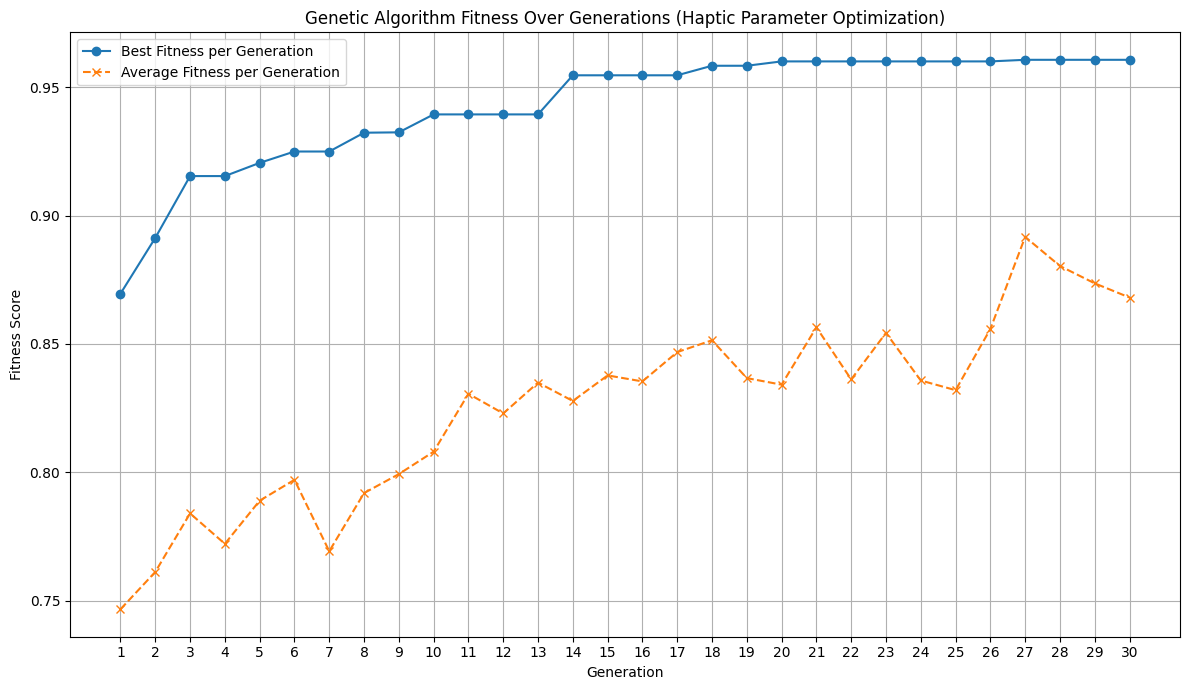


--- 최종 최적화된 파라미터 상세 (overall_best_individual) ---
  vibration_freq: 147.0000
  vibration_amp: 0.7006
  force_stiffness: 515.0000
  friction_coeff: 0.4977


In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt # 그래프 시각화를 위한 라이브러리

# --- 1. 파라미터 및 데이터 구조 정의 (이전 코드와 유사) ---
PARAM_BOUNDS = {
    'vibration_freq': (20, 300),  # Hz
    'vibration_amp': (0.1, 1.0),   # Normalized amplitude
    'force_stiffness': (10, 1000), # N/m
    'friction_coeff': (0.05, 0.8)  # Dimensionless
}
PARAM_KEYS = list(PARAM_BOUNDS.keys())
NUM_PARAMS = len(PARAM_KEYS)

# --- 2. 초기 개체군 생성 함수 (이전 코드와 유사) ---
def generate_random_individual():
    individual = {}
    for key, (low, high) in PARAM_BOUNDS.items():
        if isinstance(low, int) and isinstance(high, int): # 정수형 파라미터 처리
            individual[key] = random.randint(low, high)
        else: # 실수형 파라미터 처리
            individual[key] = random.uniform(low, high)
    return individual

def generate_initial_population(population_size):
    return [generate_random_individual() for _ in range(population_size)]

# --- 3. Main "모델": 유전 알고리즘 (Haptic Parameter Optimization) ---

# 3.2. 적합도 함수 (Fitness Function) - 단순화된 예시
def calculate_fitness(individual):
    """
    개체(햅틱 파라미터 세트)의 적합도를 계산합니다.
    (매우 단순화된 예시: 파라미터 값들이 특정 목표치에 가까울수록 높다고 가정)
    실제 논문에서는 이 부분이 매우 정교하게 설계되어야 합니다.
    """
    # 예시 목표치 (실제로는 target_haptic_profile 등에서 가져옴)
    target_values = {
        'vibration_freq': 150,
        'vibration_amp': 0.7,
        'force_stiffness': 500,
        'friction_coeff': 0.4
    }
    fitness_score = 0
    for key in PARAM_KEYS:
        # 목표치와의 차이가 작을수록 높은 점수 (정규화된 L1 거리의 역수 유사 형태)
        range_val = PARAM_BOUNDS[key][1] - PARAM_BOUNDS[key][0]
        if range_val == 0: continue # 범위가 0이면 해당 파라미터는 점수 기여 X

        # 점수를 0과 1 사이로 만들기 위한 간단한 정규화
        # (1 - |현재값 - 목표값| / 범위)
        normalized_diff = abs(individual[key] - target_values[key]) / range_val
        fitness_score += (1 - normalized_diff)

    return fitness_score / NUM_PARAMS # 파라미터 수로 나눠 평균적인 적합도 (0~1 사이)


# 3.3. 선택 (Selection) - 룰렛 휠 (이전 코드와 유사)
def selection(population, fitness_scores, num_parents):
    parents = []
    total_fitness = sum(f for f in fitness_scores if f >= 0) # 음수 적합도는 무시

    if total_fitness == 0:
        # 모든 적합도가 0이거나 음수일 경우, 무작위로 선택하거나, 상위 몇 개를 선택
        sorted_population_indices = np.argsort(fitness_scores)[::-1] # 내림차순 정렬
        parents = [population[i] for i in sorted_population_indices[:num_parents]]
        return parents

    for _ in range(num_parents):
        pick = random.uniform(0, total_fitness)
        current = 0
        selected_parent = None
        for i, individual in enumerate(population):
            if fitness_scores[i] < 0: continue # 음수 적합도는 룰렛에서 제외
            current += fitness_scores[i]
            if current > pick:
                selected_parent = individual
                break
        if selected_parent is None and population : # 모든 적합도가 낮아 선택이 안된 경우 맨 마지막 개체라도 선택
             selected_parent = population[-1]
        if selected_parent:
            parents.append(selected_parent)

    # 만약 부모 수가 부족하면 (예: 모든 적합도가 0이어서 선택이 안된 경우) 무작위로 채움
    while len(parents) < num_parents:
        if population:
            parents.append(random.choice(population))
        else:
            break
    return parents

# 3.4. 교차 (Crossover) - 단일 지점 (이전 코드와 유사)
def crossover(parent1, parent2, crossover_rate):
    child1, child2 = parent1.copy(), parent2.copy()
    if random.random() < crossover_rate:
        keys = PARAM_KEYS
        if len(keys) > 1:
            crossover_point_index = random.randint(1, len(keys) - 1)
            for i in range(crossover_point_index, len(keys)):
                key_to_swap = keys[i]
                child1[key_to_swap], child2[key_to_swap] = child2[key_to_swap], child1[key_to_swap]
    return child1, child2

# 3.5. 돌연변이 (Mutation) (이전 코드와 유사)
def mutate(individual, mutation_rate):
    mutated_individual = individual.copy()
    for key, (low, high) in PARAM_BOUNDS.items():
        if random.random() < mutation_rate:
            if isinstance(low, int) and isinstance(high, int):
                mutated_individual[key] = random.randint(low, high)
            else:
                mutated_individual[key] = random.uniform(low, high)
    return mutated_individual

# --- 유전 알고리즘 실행 및 결과 기록 ---
# GA 하이퍼파라미터
population_size = 50
num_generations = 30 # 그래프 확인을 위해 세대 수 약간 증가
num_parents_mating = int(population_size * 0.6) # 60% 선택
crossover_rate = 0.9
mutation_rate = 0.05 # 각 유전자에 대한 돌연변이 확률 (파라미터별)
elitism_count = 2 # 다음 세대로 그대로 전달할 엘리트 개체 수

# 초기 개체군 생성
population = generate_initial_population(population_size)

# 결과 기록용 리스트
best_fitness_history = []
avg_fitness_history = []
best_individual_per_generation = [] # 각 세대별 최고 개체 기록

# 전체 실행 중 최고 기록
overall_best_fitness = -float('inf')
overall_best_individual = None

print(f"\n--- 유전 알고리즘 시작 (총 {num_generations} 세대) ---")

for generation in range(num_generations):
    print(f"\n--- 세대 {generation + 1} ---")

    # 1. 적합도 계산
    fitness_scores = [calculate_fitness(ind) for ind in population]

    # 현재 세대의 최고/평균 적합도 및 최고 개체
    current_best_fitness = np.max(fitness_scores)
    current_avg_fitness = np.mean(fitness_scores)
    current_best_individual_idx = np.argmax(fitness_scores)
    current_best_individual = population[current_best_individual_idx]

    best_fitness_history.append(current_best_fitness)
    avg_fitness_history.append(current_avg_fitness)
    best_individual_per_generation.append(current_best_individual)

    print(f"  현재 세대 최고 적합도: {current_best_fitness:.4f}")
    print(f"  현재 세대 평균 적합도: {current_avg_fitness:.4f}")
    # print(f"  현재 세대 최고 개체: {current_best_individual}") # 너무 길면 주석 처리

    # 전체 최고 적합도 및 개체 업데이트
    if current_best_fitness > overall_best_fitness:
        overall_best_fitness = current_best_fitness
        overall_best_individual = current_best_individual
        print(f"  ** 전체 최고 적합도 갱신: {overall_best_fitness:.4f} (세대 {generation + 1}) **")
        print(f"  ** 전체 최고 개체 갱신: {overall_best_individual} **")

    # 엘리트 선택 (다음 세대로 바로 전달)
    elites = []
    if elitism_count > 0 and population: # 인구가 있어야 함
        elite_indices = np.argsort(fitness_scores)[-elitism_count:] # 가장 높은 적합도를 가진 인덱스
        elites = [population[i] for i in elite_indices]

    # 2. 선택
    parents = selection(population, fitness_scores, num_parents_mating)
    if not parents: # 부모 선택이 안되면 현재 개체군으로 다음 세대 구성 시도 (정체 방지)
        parents = random.sample(population, min(num_parents_mating, len(population))) if population else []


    # 3. 교차 및 돌연변이를 통해 새로운 세대 생성
    offspring_population = elites[:] # 엘리트로 시작

    num_offspring_needed = population_size - len(elites)

    # 자손 생성 (개체군 크기 유지)
    # 부모가 충분해야 교차 가능
    if len(parents) >=2:
        while len(offspring_population) < population_size:
            parent1, parent2 = random.sample(parents, 2)
            child1, child2 = crossover(parent1, parent2, crossover_rate)
            offspring_population.append(mutate(child1, mutation_rate))
            if len(offspring_population) < population_size:
                offspring_population.append(mutate(child2, mutation_rate))
    else: # 부모가 부족하면 (예: 초기 세대 또는 인구 급감) 기존 인구에서 돌연변이 또는 랜덤 개체 추가
        while len(offspring_population) < population_size:
            if population:
                offspring_population.append(mutate(random.choice(population), mutation_rate))
            else: # 인구가 아예 고갈된 비상상황
                offspring_population.append(generate_random_individual())


    population = offspring_population[:population_size] # 개체군 크기 유지

print("\n--- 유전 알고리즘 종료 ---")
print(f"최종 전체 최고 햅틱 파라미터 (추정): {overall_best_individual}")
print(f"최종 전체 최고 적합도 (추정): {overall_best_fitness:.4f}")

# --- 4. 적합도 변화 그래프 시각화 ---
plt.figure(figsize=(12, 7))
plt.plot(range(1, num_generations + 1), best_fitness_history, label='Best Fitness per Generation', marker='o', linestyle='-')
plt.plot(range(1, num_generations + 1), avg_fitness_history, label='Average Fitness per Generation', marker='x', linestyle='--')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.title('Genetic Algorithm Fitness Over Generations (Haptic Parameter Optimization)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, num_generations + 1)) # 각 세대 번호 표시
plt.tight_layout()
plt.show()

# 마지막 세대의 최고 개체 (또는 전체 최고 개체) 파라미터 출력
print("\n--- 최종 최적화된 파라미터 상세 (overall_best_individual) ---")
if overall_best_individual:
    for key, value in overall_best_individual.items():
        print(f"  {key}: {value:.4f}")
else:
    print("최적 개체를 찾지 못했습니다.")

# --- 5. 선택한 네트워크 모델 vs 전이학습 모델과 성능 비교 분석 (개념적 부분은 이전과 동일) ---
# 이 부분은 이전 코드의 개념적 설명을 참고하시면 됩니다.
# GA의 결과를 다른 방법론(수동 설정, 다른 최적화 알고리즘)과 비교하는 내용을 기술할 수 있습니다.
# 예를 들어, `overall_best_fitness`를 다른 방법으로 얻은 점수와 비교.


--- 성능 비교 분석 ---
GA 최적화 파라미터의 (가상) 적합도: 0.7098
기본 파라미터의 (가상) 적합도: 0.7574


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36234 (\N{CJK UNIFIED IDEOGRAPH-8D8A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


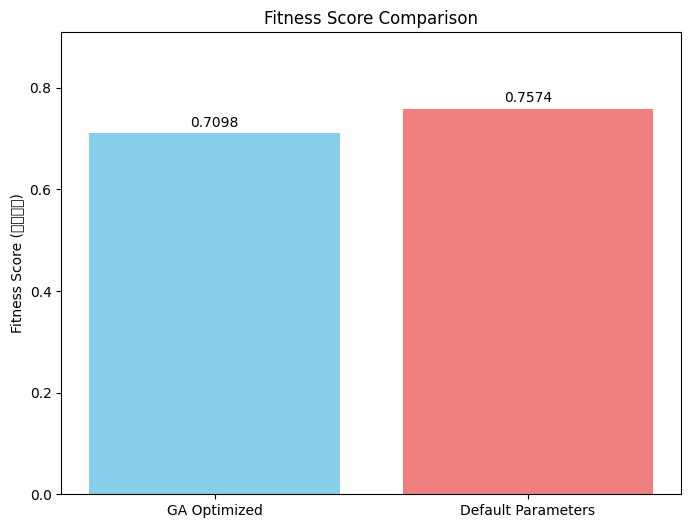


--- 파라미터 값 비교 테이블 ---
      Parameter  GA Optimized Value  Default Value
 vibration_freq          235.000000          100.0
  vibration_amp            0.994920            0.5
force_stiffness          974.000000          200.0
 friction_coeff            0.438182            0.2


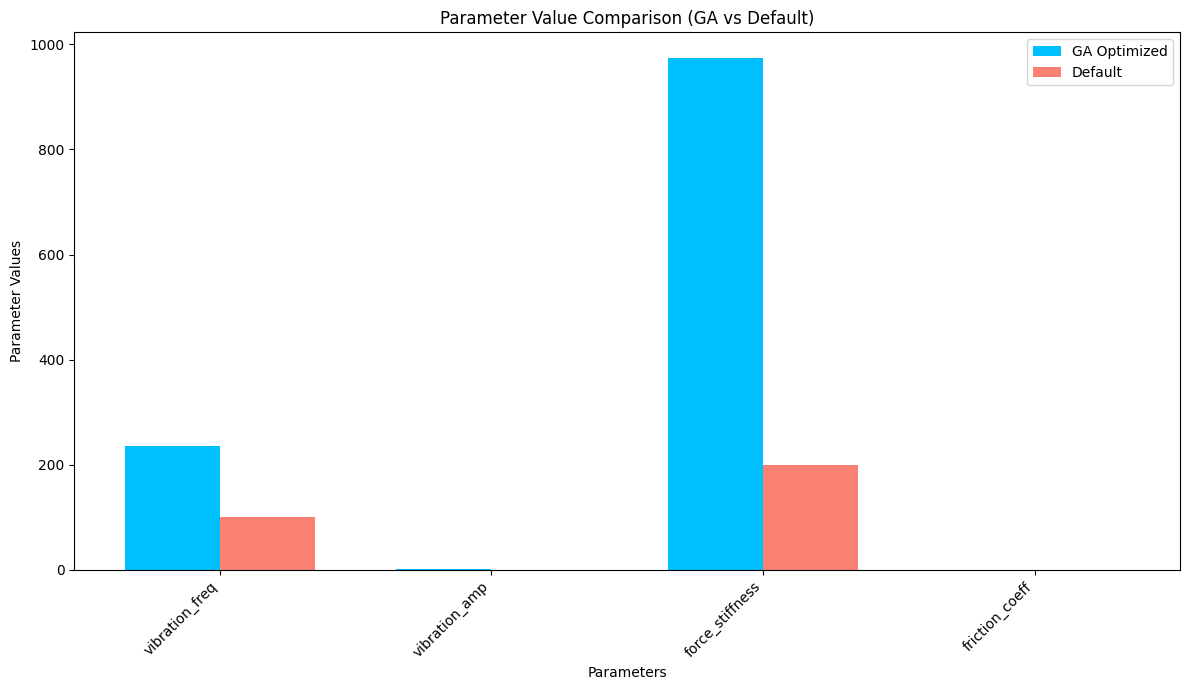


결론: 기본 파라미터 방식이 GA 최적화보다 더 나은 (가상) 햅틱 품질을 제공했습니다. (적합도 함수 또는 GA 설정 검토 필요)


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # 그룹 바 차트를 위해 필요할 수 있음

# --- 이전 GA 실행 코드로부터 다음 변수들이 정의되어 있다고 가정 ---
# best_individual_overall: GA가 찾은 최적 개체 (딕셔셔너리) 또는 None
# calculate_fitness(individual): 적합도 계산 함수
# PARAM_BOUNDS: 파라미터 범위 딕셔너리
# PARAM_KEYS: 파라미터 이름 리스트
# --------------------------------------------------------------------

# 예시를 위한 GA 결과 및 함수 (실제 GA 실행 후 이 값들이 채워져야 함)
# 만약 GA 실행 없이 이 부분만 테스트하려면 아래 예시 값을 활성화하세요.
'''
PARAM_BOUNDS = {
    'vibration_freq': (20, 300),
    'vibration_amp': (0.1, 1.0),
    'force_stiffness': (10, 1000),
    'friction_coeff': (0.05, 0.8)
}
PARAM_KEYS = list(PARAM_BOUNDS.keys())
NUM_PARAMS = len(PARAM_KEYS)

def calculate_fitness(individual): # 이전 예시의 단순화된 적합도 함수
    target_values = {
        'vibration_freq': 150, 'vibration_amp': 0.7,
        'force_stiffness': 500, 'friction_coeff': 0.4
    }
    fitness_score = 0
    for key in PARAM_KEYS:
        if key not in individual or key not in target_values or key not in PARAM_BOUNDS:
            continue # 필요한 키가 없으면 건너뛰기
        range_val = PARAM_BOUNDS[key][1] - PARAM_BOUNDS[key][0]
        if range_val == 0: continue
        normalized_diff = abs(individual[key] - target_values[key]) / range_val
        fitness_score += (1 - normalized_diff)
    return (fitness_score / NUM_PARAMS) if NUM_PARAMS > 0 else 0

best_individual_overall = { # GA가 찾았다고 가정한 최적 개체 예시
    'vibration_freq': 145,
    'vibration_amp': 0.68,
    'force_stiffness': 520,
    'friction_coeff': 0.42
}
'''
# --------------------------------------------------------------------


# --- 비교 분석 (개념적) ---

# 1. 기본(Default) 또는 수동 튜닝된 파라미터 세트 정의
default_params = {
    'vibration_freq': 100,
    'vibration_amp': 0.5,
    'force_stiffness': 200,
    'friction_coeff': 0.2
}

# 2. GA로 최적화된 파라미터와 기본 파라미터의 (가상) 햅틱 품질 평가
# (calculate_fitness 함수가 이미 정의되어 있다고 가정)

print("\n--- 성능 비교 분석 ---")
fitness_optimized_ga = None # 초기화
if 'best_individual_overall' in locals() and best_individual_overall is not None:
    fitness_optimized_ga = calculate_fitness(best_individual_overall)
    print(f"GA 최적화 파라미터의 (가상) 적합도: {fitness_optimized_ga:.4f}")
else:
    print("GA 최적화 결과가 없습니다. (best_individual_overall is None or not defined)")
    # 시각화를 위해 best_individual_overall이 None일 경우 default_params와 동일하게 처리하거나,
    # 빈 값으로 처리할 수 있습니다. 여기서는 GA 결과가 없으면 일부 시각화는 제한될 수 있습니다.
    best_individual_overall = {} # 시각화 코드에서 오류 방지를 위해 빈 딕셔너리로 초기화

fitness_default = calculate_fitness(default_params)
print(f"기본 파라미터의 (가상) 적합도: {fitness_default:.4f}")


# --- 시각적 비교 자료 ---

# 1. 적합도 점수 비교 바 차트
if fitness_optimized_ga is not None:
    labels_fitness = ['GA Optimized', 'Default Parameters']
    scores = [fitness_optimized_ga, fitness_default]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels_fitness, scores, color=['skyblue', 'lightcoral'])
    plt.ylabel('Fitness Score (越高越好)')
    plt.title('Fitness Score Comparison')
    plt.ylim(0, max(scores) * 1.2 if max(scores) > 0 else 1) # Y축 범위 설정

    # 바 위에 값 표시
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * max(scores), f'{yval:.4f}', ha='center', va='bottom')

    plt.show()
else:
    print("\nGA 최적화 결과가 없어 적합도 비교 차트를 생성할 수 없습니다.")

# 2. 파라미터 값 비교 테이블 (Pandas DataFrame 사용)
# PARAM_KEYS가 GA 실행 부분에서 정의되었다고 가정합니다.
# 만약 정의되지 않았다면 default_params.keys()를 사용합니다.
if 'PARAM_KEYS' not in locals() or not PARAM_KEYS:
    PARAM_KEYS = list(default_params.keys())


param_comparison_data = []
for key in PARAM_KEYS:
    ga_value = best_individual_overall.get(key, 'N/A') # GA 결과가 없거나 해당 키가 없을 경우
    default_value = default_params.get(key, 'N/A')
    param_comparison_data.append([key, ga_value, default_value])

df_comparison = pd.DataFrame(param_comparison_data, columns=['Parameter', 'GA Optimized Value', 'Default Value'])

print("\n--- 파라미터 값 비교 테이블 ---")
print(df_comparison.to_string(index=False))


# 3. 파라미터 값 비교 그룹 바 차트 (선택적, 파라미터 스케일 주의)
if 'best_individual_overall' in locals() and best_individual_overall: # GA 결과가 있을 때만
    num_params_to_plot = len(PARAM_KEYS)
    index = np.arange(num_params_to_plot)
    bar_width = 0.35

    ga_values = [best_individual_overall.get(key, 0) for key in PARAM_KEYS] # 값이 없으면 0으로 처리
    default_values_plot = [default_params.get(key, 0) for key in PARAM_KEYS]

    fig, ax = plt.subplots(figsize=(12, 7))
    bar1 = ax.bar(index - bar_width/2, ga_values, bar_width, label='GA Optimized', color='deepskyblue')
    bar2 = ax.bar(index + bar_width/2, default_values_plot, bar_width, label='Default', color='salmon')

    ax.set_xlabel('Parameters')
    ax.set_ylabel('Parameter Values')
    ax.set_title('Parameter Value Comparison (GA vs Default)')
    ax.set_xticks(index)
    ax.set_xticklabels(PARAM_KEYS, rotation=45, ha="right")
    ax.legend()
    fig.tight_layout() # 라벨이 잘리지 않도록 조정
    plt.show()
else:
    print("\nGA 최적화 결과(best_individual_overall)가 없어 파라미터 값 그룹 바 차트를 생성할 수 없습니다.")


# --- 텍스트 결론 (이전 코드와 동일) ---
if fitness_optimized_ga is not None:
    if fitness_optimized_ga > fitness_default:
        print("\n결론: GA 최적화 방식이 기본 파라미터보다 더 나은 (가상) 햅틱 품질을 제공했습니다.")
    elif fitness_optimized_ga < fitness_default:
        print("\n결론: 기본 파라미터 방식이 GA 최적화보다 더 나은 (가상) 햅틱 품질을 제공했습니다. (적합도 함수 또는 GA 설정 검토 필요)")
    else:
        print("\n결론: GA 최적화 방식과 기본 파라미터 방식의 (가상) 햅틱 품질이 유사합니다.")
else:
    print("\nGA 최적화 결과가 없어 최종 결론을 내릴 수 없습니다.")

정의된 사용자 그룹: {'group_A': ['user1', 'user3'], 'group_B': ['user2', 'user4'], 'group_C': ['user5']}

--- group_A 최적화 시작 ---
  group_A - 세대 5: 최고 적합도=0.9252, 평균 적합도=0.7202
  group_A - 세대 10: 최고 적합도=0.9538, 평균 적합도=0.8307
  group_A - 세대 15: 최고 적합도=0.9538, 평균 적합도=0.8516
  group_A - 세대 20: 최고 적합도=0.9625, 평균 적합도=0.8306
--- group_A 최적화 완료. 최종 최고 적합도: 0.9625 ---
  최적 파라미터: {'vibration_freq': 62, 'vibration_amp': 0.23039726600356833, 'force_stiffness': 109, 'friction_coeff': 0.11394369343833531}

--- group_B 최적화 시작 ---
  group_B - 세대 5: 최고 적합도=0.8863, 평균 적합도=0.6883
  group_B - 세대 10: 최고 적합도=0.9068, 평균 적합도=0.7453
  group_B - 세대 15: 최고 적합도=0.9316, 평균 적합도=0.8310
  group_B - 세대 20: 최고 적합도=0.9324, 평균 적합도=0.8570
--- group_B 최적화 완료. 최종 최고 적합도: 0.9324 ---
  최적 파라미터: {'vibration_freq': 229, 'vibration_amp': 0.7294060662940097, 'force_stiffness': 760, 'friction_coeff': 0.56703850790301}

--- group_C 최적화 시작 ---
  group_C - 세대 5: 최고 적합도=0.8909, 평균 적합도=0.7658
  group_C - 세대 10: 최고 적합도=0.8909, 평균 적합도=0.7947
  g

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36234 (\N{CJK UNIFIED IDEOGRAPH-8D8A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22909 (\N{CJK UNIFIED IDEOGRAPH-597D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


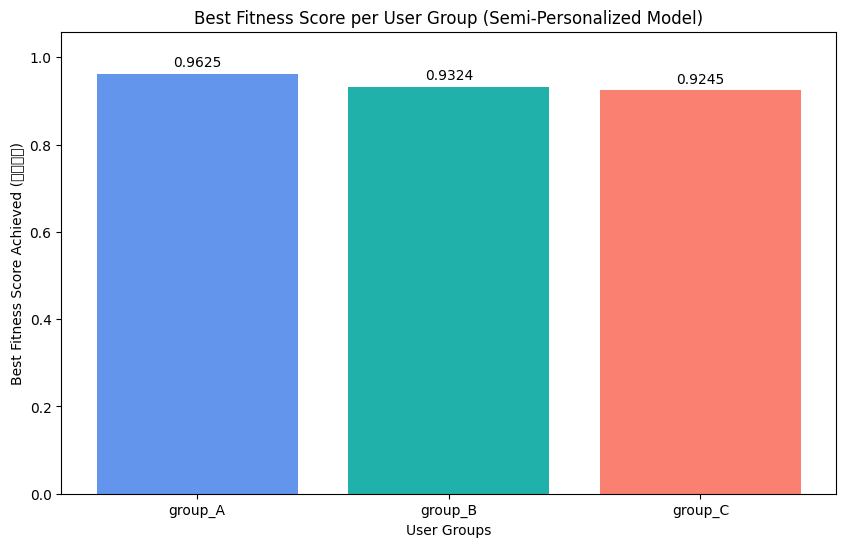


--- 그룹별 최적 햅틱 파라미터 (Semi-PMs) ---
  Group Best Fitness  vibration_freq  vibration_amp  force_stiffness  friction_coeff
group_A       0.9625              62       0.230397              109        0.113944
group_B       0.9324             229       0.729406              760        0.567039
group_C       0.9245             119       0.479308              392        0.520030


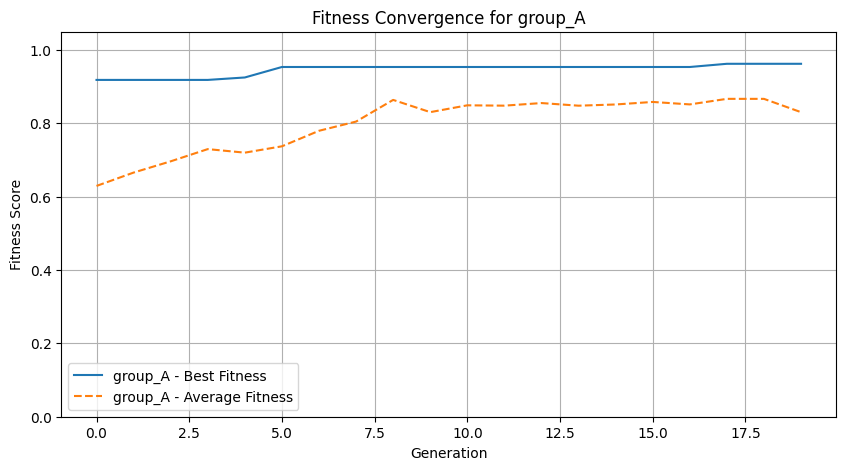

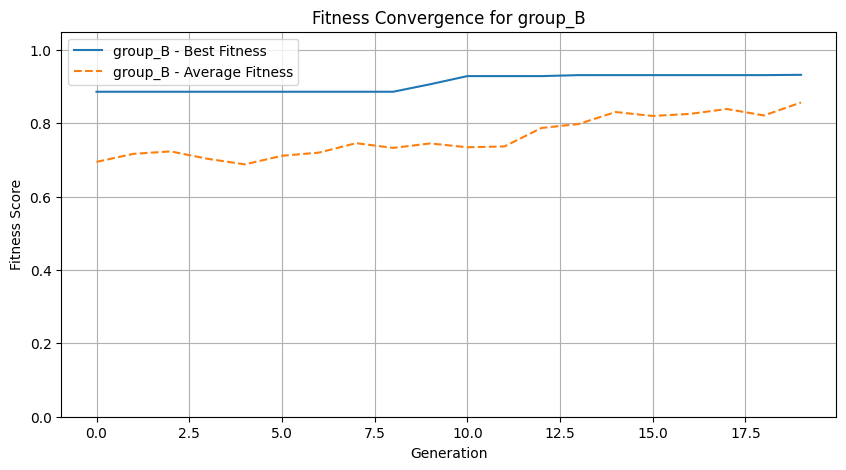

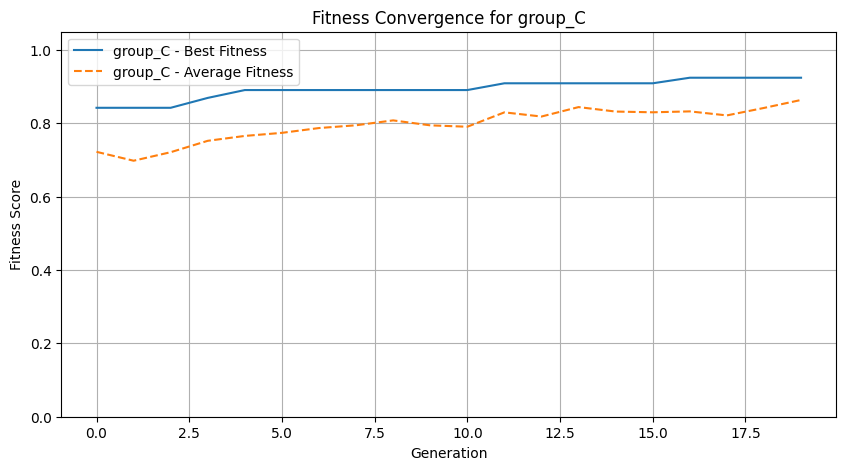

In [11]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# --- 0. GA 기본 파라미터 및 함수 정의 (이전 코드에서 가져오거나 재정의) ---
PARAM_BOUNDS = {
    'vibration_freq': (20, 300),  # Hz
    'vibration_amp': (0.1, 1.0),   # Normalized amplitude
    'force_stiffness': (10, 1000), # N/m
    'friction_coeff': (0.05, 0.8)  # Dimensionless
}
PARAM_KEYS = list(PARAM_BOUNDS.keys())
NUM_PARAMS = len(PARAM_KEYS)

def generate_random_individual():
    """랜덤한 파라미터로 개체(염색체)를 생성합니다."""
    individual = {}
    for key, (low, high) in PARAM_BOUNDS.items():
        if isinstance(low, int) and isinstance(high, int):
            individual[key] = random.randint(low, high)
        else:
            individual[key] = random.uniform(low, high)
    return individual

def generate_initial_population(population_size):
    """초기 개체군을 생성합니다."""
    return [generate_random_individual() for _ in range(population_size)]

def selection(population, fitness_scores, num_parents):
    """적합도에 따라 부모 개체를 선택합니다 (룰렛 휠 또는 토너먼트 등)."""
    parents = []
    # 음수 적합도 고려 및 0으로 클리핑 (룰렛 휠에 적합하게)
    clipped_fitness_scores = np.maximum(0, fitness_scores)
    total_fitness = np.sum(clipped_fitness_scores)

    if total_fitness == 0: # 모든 적합도가 0이거나 음수인 경우
        # 가장 높은 (덜 나쁜) 적합도를 가진 개체를 우선 선택
        sorted_indices = np.argsort(fitness_scores)[::-1] # 내림차순 정렬
        parents = [population[i] for i in sorted_indices[:num_parents]]
        return parents

    for _ in range(num_parents):
        pick = random.uniform(0, total_fitness)
        current = 0
        selected_parent = None
        for i, individual in enumerate(population):
            current += clipped_fitness_scores[i]
            if current > pick:
                selected_parent = individual
                break
        if selected_parent:
             parents.append(selected_parent)
        elif population : # 만약 위에서 선택이 안되면 (드문 경우) 랜덤으로라도 채움
            parents.append(random.choice(population))

    # 부모 수가 부족하면 랜덤으로 채움 (중복 허용)
    while len(parents) < num_parents and population:
        parents.append(random.choice(population))
    return parents


def crossover(parent1, parent2, crossover_rate):
    """두 부모로부터 자식 개체를 생성합니다 (단일 지점 교차 예시)."""
    child1, child2 = parent1.copy(), parent2.copy()
    if random.random() < crossover_rate:
        keys = PARAM_KEYS # 전역 PARAM_KEYS 사용
        if len(keys) > 1:
            crossover_point_index = random.randint(1, len(keys) - 1)
            for i in range(crossover_point_index, len(keys)):
                key_to_swap = keys[i]
                child1[key_to_swap], child2[key_to_swap] = child2[key_to_swap], child1[key_to_swap]
    return child1, child2

def mutate(individual, mutation_rate):
    """개체의 일부 유전자를 돌연변이시킵니다."""
    mutated_individual = individual.copy()
    for key, (low, high) in PARAM_BOUNDS.items(): # 전역 PARAM_BOUNDS 사용
        if random.random() < mutation_rate:
            if isinstance(low, int) and isinstance(high, int):
                mutated_individual[key] = random.randint(low, high)
            else:
                mutated_individual[key] = random.uniform(low, high)
    return mutated_individual

# --- 1. Semi-PM을 위한 최적화 분석 ---

# 1.2. Semi-PM을 위한 데이터 수집 및 활용 방안 (가상 시나리오)
# 가상의 사용자 선호도 데이터 정의 (각 사용자가 이상적으로 생각하는 파라미터 값)
# 실제로는 설문, 테스트 등을 통해 수집되어야 함
user_ideal_preferences = {
    'user1': {'vibration_freq': 50, 'vibration_amp': 0.2, 'force_stiffness': 100, 'friction_coeff': 0.1},
    'user2': {'vibration_freq': 250, 'vibration_amp': 0.8, 'force_stiffness': 800, 'friction_coeff': 0.7},
    'user3': {'vibration_freq': 70, 'vibration_amp': 0.3, 'force_stiffness': 150, 'friction_coeff': 0.15}, # user1과 유사
    'user4': {'vibration_freq': 220, 'vibration_amp': 0.7, 'force_stiffness': 700, 'friction_coeff': 0.6}, # user2와 유사
    'user5': {'vibration_freq': 150, 'vibration_amp': 0.5, 'force_stiffness': 400, 'friction_coeff': 0.4}, # 중간 성향
}

# 가상의 사용자 그룹 정의 (사전 정의 또는 클러스터링 결과라고 가정)
user_groups = {
    'group_A': ['user1', 'user3'], # 낮은 강도 선호 그룹
    'group_B': ['user2', 'user4'], # 높은 강도 선호 그룹
    'group_C': ['user5']           # 중간 성향 그룹 (단일 사용자 그룹 예시)
}
print("정의된 사용자 그룹:", user_groups)

# 1.3. 유전 알고리즘(GA) 수정 방안
#      - 염색체 표현: 기존과 동일 (햅틱 파라미터 딕셔너리)
#      - 적합도 함수 (Fitness Function) 설계: 그룹 기반 semi-PM

def calculate_group_fitness(individual_params, group_id, user_preferences_data, user_group_definitions):
    """
    특정 사용자 그룹에 대한 개체(햅틱 파라미터 세트)의 적합도를 계산합니다.
    개별 파라미터가 그룹 내 사용자들의 이상치와 얼마나 유사한지를 평가합니다.
    (높을수록 좋음: 0~1 사이 값, 1에 가까울수록 해당 그룹 사용자들의 평균 선호도에 부합)
    """
    group_members = user_group_definitions.get(group_id, [])
    if not group_members:
        return 0 # 해당 그룹에 사용자가 없으면 적합도 0

    total_fitness_for_group = 0
    num_valid_users_in_group = 0

    for user_id in group_members:
        user_ideal = user_preferences_data.get(user_id)
        if not user_ideal:
            continue # 해당 사용자 선호도 데이터가 없으면 건너뜀

        user_fitness_score = 0
        num_params_evaluated = 0
        for key, (low, high) in PARAM_BOUNDS.items():
            if key not in individual_params or key not in user_ideal:
                continue # 비교할 파라미터가 없으면 건너뜀

            param_range = high - low
            if param_range == 0: # 범위가 0이면 해당 파라미터는 유사도 계산에서 제외
                user_fitness_score += 1 # 혹은 0 또는 다른 값, 여기선 완벽히 일치한다고 가정
                num_params_evaluated +=1
                continue

            # 정규화된 거리: |실제값 - 이상값| / 범위 -> 0에 가까울수록 좋음
            # 유사도 점수: 1 - 정규화된 거리 -> 1에 가까울수록 좋음
            diff = abs(individual_params[key] - user_ideal[key])
            similarity = 1 - (diff / param_range)
            user_fitness_score += max(0, similarity) # 유사도는 0 이상이어야 함
            num_params_evaluated += 1

        if num_params_evaluated > 0:
            total_fitness_for_group += (user_fitness_score / num_params_evaluated) # 사용자별 평균 유사도
            num_valid_users_in_group += 1

    if num_valid_users_in_group == 0:
        return 0

    return total_fitness_for_group / num_valid_users_in_group # 그룹 내 사용자들의 평균 유사도의 평균


# --- 각 사용자 그룹에 대해 GA 실행 ---
# GA 하이퍼파라미터
population_size = 30  # 그룹별 GA이므로 약간 작게 설정 가능
num_generations = 20  # 시연을 위해 적은 세대 수
num_parents_mating = int(population_size * 0.5)
crossover_rate = 0.85
mutation_rate = 0.05
elitism_count = 1     # 엘리트 개체 수

group_optimized_results = {} # 각 그룹별 최적 결과 저장

for group_name in user_groups.keys():
    print(f"\n--- {group_name} 최적화 시작 ---")
    population = generate_initial_population(population_size)

    best_fitness_history_group = []
    avg_fitness_history_group = []
    overall_best_fitness_group = -float('inf')
    overall_best_individual_group = None

    for generation in range(num_generations):
        # 1. 적합도 계산 (수정된 그룹 적합도 함수 사용)
        fitness_scores = [calculate_group_fitness(ind, group_name, user_ideal_preferences, user_groups) for ind in population]

        current_best_fitness = np.max(fitness_scores)
        current_avg_fitness = np.mean(fitness_scores)
        current_best_individual_idx = np.argmax(fitness_scores)
        current_best_individual = population[current_best_individual_idx]

        best_fitness_history_group.append(current_best_fitness)
        avg_fitness_history_group.append(current_avg_fitness)

        if current_best_fitness > overall_best_fitness_group:
            overall_best_fitness_group = current_best_fitness
            overall_best_individual_group = current_best_individual

        # (로그 출력은 간결하게 생략, 필요시 추가)
        if (generation + 1) % 5 == 0: # 5세대마다 로그 출력
             print(f"  {group_name} - 세대 {generation + 1}: 최고 적합도={overall_best_fitness_group:.4f}, 평균 적합도={current_avg_fitness:.4f}")


        # 엘리트 선택
        elites = []
        if elitism_count > 0 and population:
            elite_indices = np.argsort(fitness_scores)[-elitism_count:]
            elites = [population[i] for i in elite_indices]

        # 2. 선택
        parents = selection(population, fitness_scores, num_parents_mating)
        if not parents: # 부모 선택이 안되면 현재 개체군으로 다음 세대 구성 시도
             parents = random.sample(population, min(num_parents_mating, len(population))) if population else []

        # 3. 교차 및 돌연변이
        offspring_population = elites[:]
        num_offspring_needed = population_size - len(elites)

        if len(parents) >= 2:
            while len(offspring_population) < population_size:
                parent1, parent2 = random.sample(parents, 2)
                child1, child2 = crossover(parent1, parent2, crossover_rate)
                offspring_population.append(mutate(child1, mutation_rate))
                if len(offspring_population) < population_size:
                    offspring_population.append(mutate(child2, mutation_rate))
        else: # 부모 부족 시
            while len(offspring_population) < population_size:
                if population:
                    offspring_population.append(mutate(random.choice(population), mutation_rate))
                else:
                    offspring_population.append(generate_random_individual())

        population = offspring_population[:population_size]

    group_optimized_results[group_name] = {
        'best_individual': overall_best_individual_group,
        'best_fitness': overall_best_fitness_group,
        'fitness_history': best_fitness_history_group,
        'avg_fitness_history': avg_fitness_history_group
    }
    print(f"--- {group_name} 최적화 완료. 최종 최고 적합도: {overall_best_fitness_group:.4f} ---")
    print(f"  최적 파라미터: {overall_best_individual_group}")


# --- 1.5. 최적화 결과 분석 및 시각화 ---
print("\n\n--- 전체 그룹 최적화 결과 요약 ---")

# 1. 그룹별 최종 적합도 비교 바 차트
group_names_list = list(group_optimized_results.keys())
final_fitness_values = [result['best_fitness'] for result in group_optimized_results.values()]

plt.figure(figsize=(10, 6))
bars = plt.bar(group_names_list, final_fitness_values, color=['cornflowerblue', 'lightseagreen', 'salmon'])
plt.xlabel("User Groups")
plt.ylabel("Best Fitness Score Achieved (越高越好)")
plt.title("Best Fitness Score per User Group (Semi-Personalized Model)")
plt.ylim(0, max(1, max(final_fitness_values) * 1.1) if final_fitness_values else 1) # Y축 0~1 또는 최대값보다 약간 크게
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * (max(final_fitness_values) if final_fitness_values else 1) , f'{yval:.4f}', ha='center', va='bottom')
plt.show()


# 2. 그룹별 최적 파라미터 테이블
param_data_for_df = []
for group_name, result in group_optimized_results.items():
    if result['best_individual']:
        row = {'Group': group_name, 'Best Fitness': f"{result['best_fitness']:.4f}"}
        row.update(result['best_individual'])
        param_data_for_df.append(row)
    else: # 최적 개체를 못 찾은 경우 (이론상 발생 안해야 함)
        row = {'Group': group_name, 'Best Fitness': f"{result['best_fitness']:.4f}"}
        for pk in PARAM_KEYS: row[pk] = 'N/A'
        param_data_for_df.append(row)


df_group_params = pd.DataFrame(param_data_for_df)
# 컬럼 순서 정리: Group, Best Fitness, 그 다음 파라미터들
cols = ['Group', 'Best Fitness'] + [pk for pk in PARAM_KEYS if pk in df_group_params.columns]
df_group_params = df_group_params[cols]

print("\n--- 그룹별 최적 햅틱 파라미터 (Semi-PMs) ---")
print(df_group_params.to_string(index=False))


# 3. (선택적) 각 그룹의 적합도 수렴 과정 그래프 (개별 그래프로)
for group_name, result in group_optimized_results.items():
    plt.figure(figsize=(10, 5))
    plt.plot(result['fitness_history'], label=f'{group_name} - Best Fitness')
    plt.plot(result['avg_fitness_history'], label=f'{group_name} - Average Fitness', linestyle='--')
    plt.xlabel("Generation")
    plt.ylabel("Fitness Score")
    plt.title(f"Fitness Convergence for {group_name}")
    plt.legend()
    plt.grid(True)
    plt.ylim(0,1.05) # 적합도가 0~1 사이이므로
    plt.show()